<a href="https://colab.research.google.com/github/eRuaro/prac-research/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
path = '/content/drive/MyDrive/prac-research/actual/data/research-data-all.csv'

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(
    path,
    low_memory=False,
    parse_dates=['time']
)

df.head()

,name,region,country,longitude,latitude,time,temp_c,is_day,condition,wind_kph,wind_degree,wind_dir,air_pressure,precipitation,relative_humidity,cloud,feelslike_c,will_it_rain,chance_of_rain
0,Cebu,Cebu City,Philippines,123.89,10.31,2021-12-10 00:00:00,24.9,0,Cloudy,15.5,358,N,1011.55,0.92,88.9,65,27.6,0,0
1,Iloilo,Iloilo City,Philippines,122.56,10.70,2021-12-10 00:00:00,24.7,0,Cloudy,24.8,22,NNE,1010.96,0.02,79.7,63,27.2,0,0
2,Makati,Manila,Philippines,121.03,14.57,2021-12-10 00:00:00,24.8,0,Clear,12.2,78,ENE,1013.88,0,67.3,10,26.3,0,0
3,Cebu,Cebu City,Philippines,123.89,10.31,2021-12-10 01:00:00,24.9,0,Cloudy,15.4,358,N,1011.27,0.96,88.23,58,27.6,0,2
4,Iloilo,Iloilo City,Philippines,122.56,10.70,2021-12-10 01:00:00,24.7,0,Cloudy,24.7,22,NNE,1010.72,0.02,76.93,64,27.2,0,2


In [ ]:
df['longitude'] = df['longitude']._convert(numeric=True)
df['latitude'] = df['latitude']._convert(numeric=True)
df['temp_c'] = df['temp_c']._convert(numeric=True)
df['wind_kph'] = df['is_day']._convert(numeric=True)
df['wind_degree'] = df['wind_degree']._convert(numeric=True)
df['air_pressure'] = df['air_pressure']._convert(numeric=True)
df['precipitation'] = df['precipitation']._convert(numeric=True)
df['relative_humidity'] = df['relative_humidity']._convert(numeric=True)
df['cloud'] = df['cloud']._convert(numeric=True)
df['feelslike_c'] = df['feelslike_c']._convert(numeric=True)

In [ ]:
df.describe()

,longitude,latitude,temp_c,wind_kph,wind_degree,air_pressure,precipitation,relative_humidity,cloud,feelslike_c
count,6696.000000,6696.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000
mean,122.493333,11.860000,26.532035,0.457277,59.601147,1010.851861,0.148675,76.492301,50.035628,29.287953
std,1.168629,1.923006,2.080102,0.498209,52.918322,2.442386,0.574599,9.819704,26.369806,2.849860
min,121.030000,10.310000,22.100000,0.000000,0.000000,984.710000,0.000000,43.800000,0.000000,24.600000
25%,121.030000,10.310000,25.000000,0.000000,29.000000,1009.437500,0.000000,69.470000,28.000000,27.200000
50%,122.560000,10.700000,25.900000,0.000000,47.000000,1010.950000,0.010000,76.830000,49.000000,28.400000
75%,123.890000,14.570000,27.800000,1.000000,74.000000,1012.490000,0.080000,84.770000,72.000000,30.800000
max,123.890000,14.570000,34.900000,1.000000,359.000000,1017.330000,12.610000,98.800000,100.000000,41.400000


In [ ]:
precipitation = df.pop('precipitation')

df.insert(0, 'precipitation', precipitation)

df.head()

,precipitation,name,region,country,longitude,latitude,time,temp_c,is_day,condition,wind_kph,wind_degree,wind_dir,air_pressure,relative_humidity,cloud,feelslike_c,will_it_rain,chance_of_rain
0,0.92,Cebu,Cebu City,Philippines,123.89,10.31,2021-12-10 00:00:00,24.9,0,Cloudy,0.0,358.0,N,1011.55,88.90,65.0,27.6,0,0
1,0.02,Iloilo,Iloilo City,Philippines,122.56,10.70,2021-12-10 00:00:00,24.7,0,Cloudy,0.0,22.0,NNE,1010.96,79.70,63.0,27.2,0,0
2,0.00,Makati,Manila,Philippines,121.03,14.57,2021-12-10 00:00:00,24.8,0,Clear,0.0,78.0,ENE,1013.88,67.30,10.0,26.3,0,0
3,0.96,Cebu,Cebu City,Philippines,123.89,10.31,2021-12-10 01:00:00,24.9,0,Cloudy,0.0,358.0,N,1011.27,88.23,58.0,27.6,0,2
4,0.02,Iloilo,Iloilo City,Philippines,122.56,10.70,2021-12-10 01:00:00,24.7,0,Cloudy,0.0,22.0,NNE,1010.72,76.93,64.0,27.2,0,2


In [ ]:
def convert_to_float(x):
    new_x = []
    for i in x:
        y = float(i)
        new_x.append(y)
    
    return new_x

In [ ]:
type(df['precipitation'][0])

numpy.float64

In [ ]:
df['precipitation'] = df['precipitation']._convert(numeric=True)
type(df['precipitation'][0])

numpy.float64

In [ ]:
type(df['precipitation'][0])

numpy.float64

## Correlation Matrix

In [ ]:
corr = df.corr().round(3)

In [ ]:
corr.style.background_gradient()

,precipitation,longitude,latitude,temp_c,wind_kph,wind_degree,air_pressure,relative_humidity,cloud,feelslike_c
precipitation,1.000000,0.179000,-0.148000,-0.040000,0.038000,0.189000,-0.341000,0.265000,0.226000,-0.002000
longitude,0.179000,1.000000,-0.921000,-0.141000,0.026000,-0.180000,-0.201000,0.613000,0.236000,0.005000
latitude,-0.148000,-0.921000,1.000000,0.126000,-0.026000,0.310000,0.292000,-0.612000,-0.181000,-0.036000
temp_c,-0.040000,-0.141000,0.126000,1.000000,0.663000,0.120000,-0.029000,0.156000,-0.240000,0.971000
wind_kph,0.038000,0.026000,-0.026000,0.663000,1.000000,0.043000,-0.083000,0.066000,0.027000,0.651000
wind_degree,0.189000,-0.180000,0.310000,0.120000,0.043000,1.000000,-0.080000,-0.058000,-0.019000,0.075000
air_pressure,-0.341000,-0.201000,0.292000,-0.029000,-0.083000,-0.080000,1.000000,-0.162000,-0.039000,-0.094000
relative_humidity,0.265000,0.613000,-0.612000,0.156000,0.066000,-0.058000,-0.162000,1.000000,0.255000,0.272000
cloud,0.226000,0.236000,-0.181000,-0.240000,0.027000,-0.019000,-0.039000,0.255000,1.000000,-0.203000
feelslike_c,-0.002000,0.005000,-0.036000,0.971000,0.651000,0.075000,-0.094000,0.272000,-0.203000,1.000000


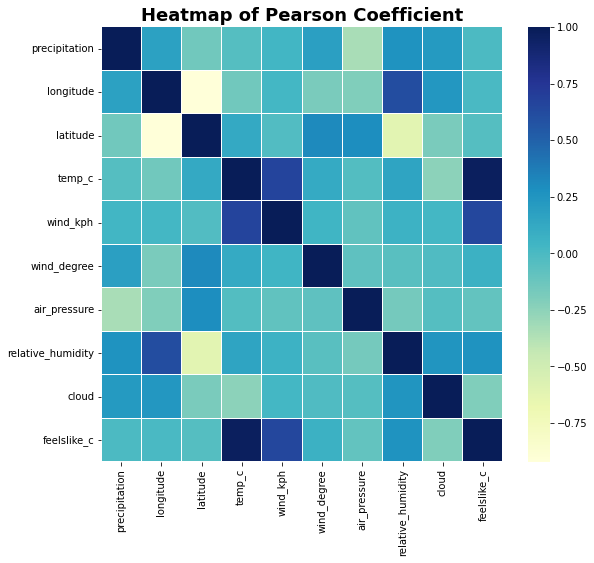

In [ ]:
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corr, ax = ax, cmap ="YlGnBu", linewidths = 0.1)
plt.title("Heatmap of Pearson Coefficient", fontweight='bold', fontsize=18)
plt.show();

### Scatter Plotting

#### Precipitation and Longitude, Latitude

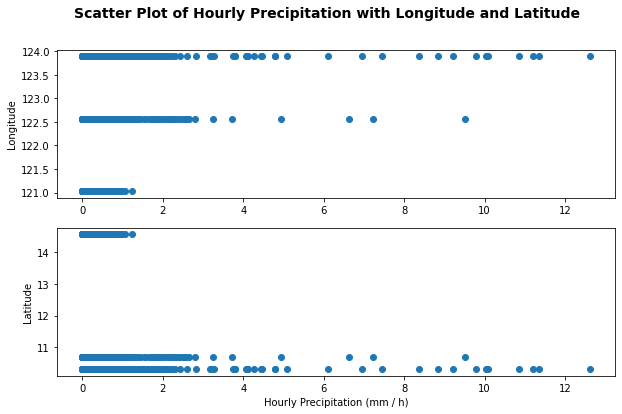

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))
fig.suptitle('Scatter Plot of Hourly Precipitation with Longitude and Latitude', fontweight='bold', fontsize=14)

precipitation = df['precipitation']._convert(numeric=True)
longitude = df['longitude']._convert(numeric=True)
latitude = df['latitude']._convert(numeric=True)

ax1.scatter(precipitation, longitude)
ax1.set_ylabel('Longitude')

ax2.scatter(precipitation, latitude)
ax2.set_xlabel('Hourly Precipitation (mm / h)')
ax2.set_ylabel('Latitude')

plt.show()

#### Precipitation and Temperatures

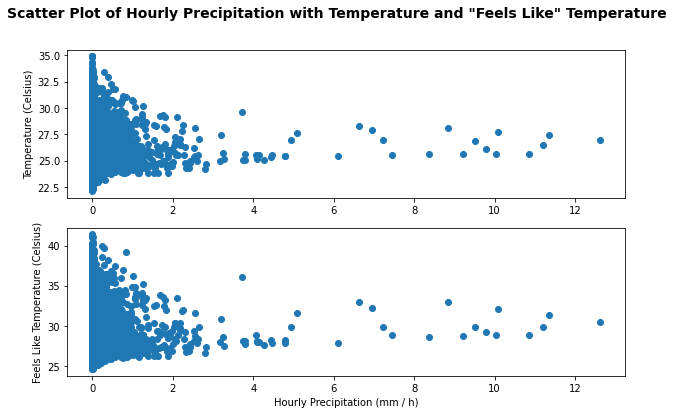

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))
fig.suptitle('Scatter Plot of Hourly Precipitation with Temperature and "Feels Like" Temperature', fontweight='bold', fontsize=14)

precipitation = df['precipitation']._convert(numeric=True)
temp_c = df['temp_c']._convert(numeric=True)
feelslike_c = df['feelslike_c']._convert(numeric=True)

ax1.scatter(precipitation, temp_c)
ax1.set_ylabel('Temperature (Celsius)')

ax2.scatter(precipitation, feelslike_c)
ax2.set_xlabel('Hourly Precipitation (mm / h)')
ax2.set_ylabel('Feels Like Temperature (Celsius)')

plt.show()

#### Precipitation and Air Pressure, Relative Humidity

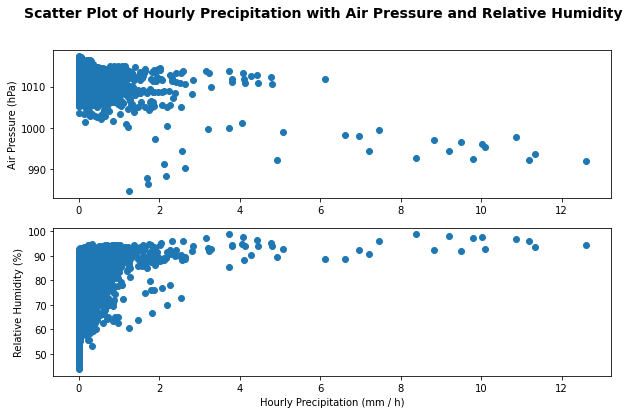

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))
fig.suptitle('Scatter Plot of Hourly Precipitation with Air Pressure and Relative Humidity', fontweight='bold', fontsize=14)

precipitation = df['precipitation']._convert(numeric=True)
air_pressure = df['air_pressure']._convert(numeric=True)
relative_humidity = df['relative_humidity']._convert(numeric=True)

ax1.scatter(precipitation, air_pressure)
ax1.set_ylabel('Air Pressure (hPa)')

ax2.scatter(precipitation, relative_humidity)
ax2.set_xlabel('Hourly Precipitation (mm / h)')
ax2.set_ylabel('Relative Humidity (%)')

plt.show()

#### Precipitation and Wind Speed, Wind Direction

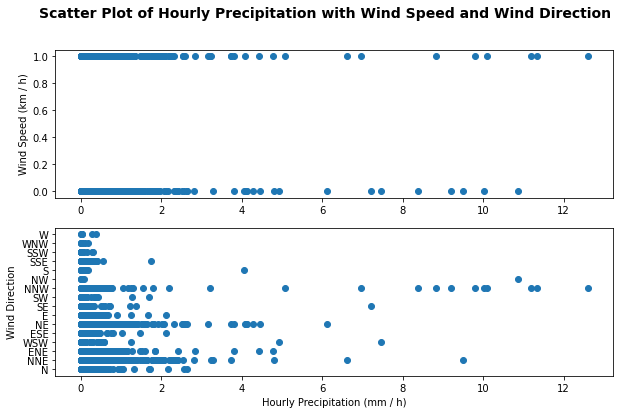

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))
fig.suptitle('Scatter Plot of Hourly Precipitation with Wind Speed and Wind Direction', fontweight='bold', fontsize=14)

precipitation = df['precipitation']._convert(numeric=True)
wind_kph = df['wind_kph']._convert(numeric=True)
# wind_dir = df['feelslike_c']._convert(numeric=True)

ax1.scatter(precipitation, wind_kph)
ax1.set_ylabel('Wind Speed (km / h)')

ax2.scatter(precipitation, df['wind_dir'])
ax2.set_xlabel('Hourly Precipitation (mm / h)')
ax2.set_ylabel('Wind Direction')

plt.show()